In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [3]:
# Function to simulate loading data (replace with actual data-loading function as needed)
def load_data():
    # Simulated example data: population (x) and profit (y)
    x_train = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])
    y_train = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233])
    return x_train, y_train

In [4]:
# Load the dataset
x_train, y_train = load_data()

# Print x_train
print("Type of x_train:", type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [5]:
# Print y_train
print("Type of y_train:", type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  
print('The shape of x_train is:', x_train.shape)
print('The shape of y_train is:', y_train.shape)
print('Number of training examples (m):', len(x_train))

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]
The shape of x_train is: (5,)
The shape of y_train is: (5,)
Number of training examples (m): 5


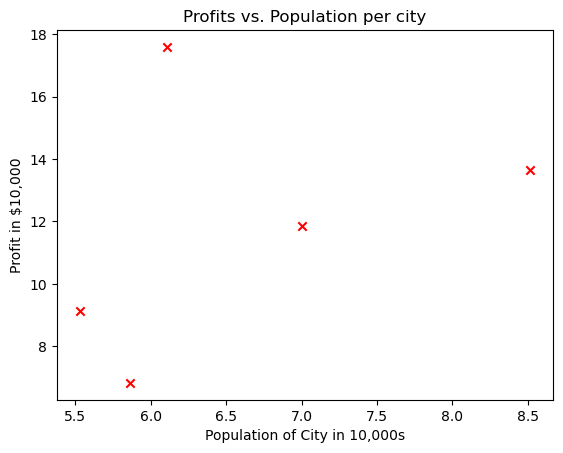

In [6]:
# Create a scatter plot of the data
plt.scatter(x_train, y_train, marker='x', c='r') 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [7]:
# Compute the cost function
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    Returns:
        total_cost (float): The cost of using w,b as the parameters for linear regression
    """
    m = x.shape[0] 
    total_cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        total_cost += (f_wb - y[i]) ** 2
    total_cost /= (2 * m)
    return total_cost

In [20]:
# Compute cost with some initial values for parameters w, b
initial_w = 2
initial_b = 1
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w: {cost:.3f}')

Cost at initial w: 9.152


In [21]:
# Compute the gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression.
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model  
    Returns:
        dj_dw (scalar): Gradient of the cost w.r.t. parameter w
        dj_db (scalar): Gradient of the cost w.r.t. parameter b
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [22]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -79.467621016 -11.812299999999999


In [23]:
# Perform gradient descent
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b.
    """
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w, b, J_history, w_history

In [24]:
# Gradient descent settings
initial_w = 0
initial_b = 0
iterations = 1500
alpha = 0.01

w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b, 
                              compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost    26.87
Iteration  150: Cost     6.09
Iteration  300: Cost     6.08
Iteration  450: Cost     6.07
Iteration  600: Cost     6.07
Iteration  750: Cost     6.06
Iteration  900: Cost     6.05
Iteration 1050: Cost     6.05
Iteration 1200: Cost     6.04
Iteration 1350: Cost     6.04
w,b found by gradient descent: 1.5878591148635817 1.2706734775735502


In [25]:
# Make predictions
m = x_train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = w * x_train[i] + b

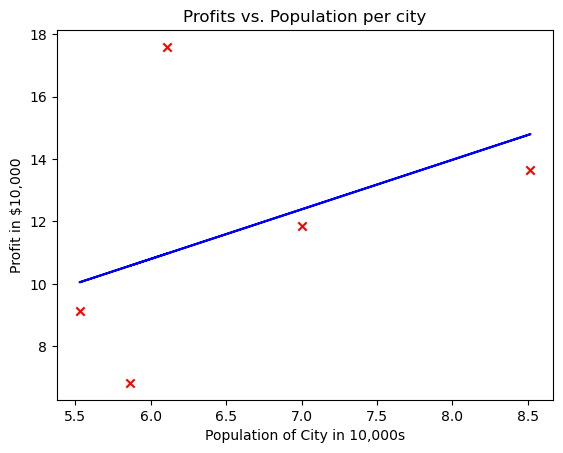

In [26]:
# Plot the linear fit
plt.plot(x_train, predicted, c="b")
plt.scatter(x_train, y_train, marker='x', c='r') 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [27]:
# Predict for populations of 35,000 and 70,000
predict1 = 3.5 * w + b
print(f'For population = 35,000, we predict a profit of ${predict1*10000:.2f}')

predict2 = 7.0 * w + b
print(f'For population = 70,000, we predict a profit of ${predict2*10000:.2f}')

For population = 35,000, we predict a profit of $68281.80
For population = 70,000, we predict a profit of $123856.87
